<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter05/2D_and_3D_facial_keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU face-alignment torch_snippets
import face_alignment
from torch_snippets import read, show

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 36.7MB 102kB/s 
     |████████████████████████████████| 102kB 9.2MB/s 


In [ ]:
!wget https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG

--2020-10-09 08:02:03--  https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2s7xjto7rb6q7dc/Hema.JPG [following]
--2020-10-09 08:02:03--  https://www.dropbox.com/s/raw/2s7xjto7rb6q7dc/Hema.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0ee1ba76a0f56bcee98526bc1.dl.dropboxusercontent.com/cd/0/inline/BA7fn6ZPDWTae24PrMX4XwIJ4lbJZ18gdShIGu-rk1drszqsCZvrQRPHHwK8v9h_-JIpKYEE_ux3KvkpP122xv_FA03pu12Q-HF4TqQh8RV1GRpPpC1AAXn1K67aiWHyCtw/file# [following]
--2020-10-09 08:02:04--  https://uca0ee1ba76a0f56bcee98526bc1.dl.dropboxusercontent.com/cd/0/inline/BA7fn6ZPDWTae24PrMX4XwIJ4lbJZ18gdShIGu-rk1drszqsCZvrQRPHHwK8v9h_-JIpKYEE_ux3KvkpP122xv_FA03pu12Q-HF4TqQh8RV1GRpPpC1AAXn1K67

In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-11f355bf06.pth.tar" to /root/.cache/torch/hub/checkpoints/2DFAN4-11f355bf06.pth.tar


In [ ]:
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 3)


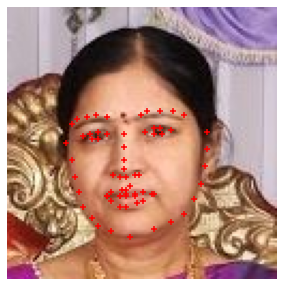

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))
show(read('Hema.JPG',1), ax=ax)
ax.scatter(preds[:,0], preds[:,1], marker='+', c='r')
plt.show()

In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False, device='cpu')
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
import pandas as pd
df = pd.DataFrame(preds)
df.columns = ['x','y','z']
import plotly.express as px
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()